# Decision Tree Analysis for Vehicle Prioritization

## Introduction

In this notebook, we aim to identify the types of vehicles that should be prioritized for purchase to minimize laid-up time at the dealership. Understanding how different vehicle specifications influence laid-up time is essential for making data-driven decisions that optimize inventory turnover and improve dealership operations.

To achieve this goal, we will use a Decision Tree model, which provides an interpretable way to discover patterns and rules based on the features of the vehicles. Decision Trees naturally capture decision paths, making it easier to pinpoint the combinations of vehicle attributes that result in shorter laid-up times.

## Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.tree import plot_tree

## Data Loading

In [2]:
# Data without correlation and target encoding
train_no_encod_no_corr = pd.read_pickle("../../data/cleaned/train/train_cleaned_no_encod_no_corr.pkl")
train_no_encod_no_corr.head()

,COMPANY,OFFICE,OFFICE_MAIN_BRAND,MANUFACTURER,VEHICLE_GROUP,VEHICLE_TYPE,MILEAGE,MILAGE_SALES,COLOR,COLOR_TYPE,...,SCALED_TOTAL_SALES_PRICE_BASIS,SCALED_TOTAL_SALE_PRICE,PURCHASE_DATE_year,PURCHASE_DATE_month,PURCHASE_DATE_day,PURCHASE_DATE_weekday,PURCHASE_BOOKING_DATE_year,PURCHASE_BOOKING_DATE_month,PURCHASE_BOOKING_DATE_day,PURCHASE_BOOKING_DATE_weekday
0,10.0,10,FOR,Ford,TOC,nan,17140.0,17140.0,BLACK,nan,...,0.015404,0.015109,2023.0,5.0,30.0,1.0,2023.0,6.0,6.0,1.0
1,12.0,52,nan,Ford,TCO,TOURNEO COURIER,10.0,10.0,GRAY,N,...,0.017037,0.014535,2024.0,4.0,18.0,3.0,2024.0,5.0,14.0,1.0
2,12.0,52,nan,Ford,TCO,TOURNEO COURIER,0.0,0.0,RED,N,...,0.015989,0.013732,2024.0,4.0,18.0,3.0,2024.0,7.0,1.0,0.0
3,12.0,52,nan,Ford,TCO,TOURNEO COURIER,0.0,0.0,WHITE,N,...,0.017399,0.014835,2024.0,4.0,11.0,3.0,2024.0,7.0,1.0,0.0
4,12.0,52,nan,Ford,TCO,TOURNEO COURIER,0.0,0.0,BLACK,N,...,0.017382,0.014805,2024.0,4.0,12.0,4.0,2024.0,6.0,14.0,4.0


In [3]:
# Preprocessed data
train_cleaned = pd.read_pickle("../../data/cleaned/train/train_cleaned.pkl")
train_cleaned.head()

,COMPANY,MILEAGE,MILAGE_SALES,NUMBER_DOORS,NUMBER_SEATS,CURB_WEIGHT,YEAR_CONSTRUCTION,NUMBER_AXLE,IS_USED_CAR,VEHICLE_MODEL_ID,...,VEHICLE_TYPE_encoded,COLOR_encoded,UPHOLSTERY_encoded,ENGINE_TYPE_encoded,TRANSMISSION_TYPE_encoded,TRANSMISSION_NAME_encoded,FINANCING_TYPE_NAME_encoded,FUEL_TYPE_encoded,DRIVE_TYPE_encoded,COMMISSION_TYPE_encoded
0,10.0,17140.0,17140.0,5.0,5.0,0.0,2022.0,0.0,1.0,4.0,...,56.374721,84.734257,45.660843,80.134294,102.500090,88.041788,81.721719,83.647334,90.305317,82.693941
1,12.0,10.0,10.0,0.0,0.0,0.0,2024.0,0.0,0.0,0.0,...,78.228040,83.712993,51.010635,82.780095,63.357524,77.433160,81.721719,76.022428,73.053107,74.887355
2,12.0,0.0,0.0,0.0,0.0,0.0,2024.0,0.0,0.0,0.0,...,78.228040,78.817161,51.010635,82.780095,63.357524,77.433160,81.721719,76.022428,73.053107,74.887355
3,12.0,0.0,0.0,0.0,0.0,0.0,2024.0,0.0,0.0,0.0,...,78.228040,93.399796,61.670583,82.780095,63.357524,77.433160,81.721719,76.022428,73.053107,74.887355
4,12.0,0.0,0.0,0.0,0.0,0.0,2024.0,0.0,0.0,8.0,...,78.228040,84.734257,51.010635,82.780095,51.177073,77.433160,81.721719,76.022428,73.053107,74.887355


In [4]:
necessary_columns = train_cleaned.columns
necessary_columns = [col.split('_encoded')[0] if 'encoded' in col else col for col in necessary_columns]

train_labeled = train_no_encod_no_corr[necessary_columns]

In [5]:
train_labeled.head()

,COMPANY,MILEAGE,MILAGE_SALES,NUMBER_DOORS,NUMBER_SEATS,CURB_WEIGHT,YEAR_CONSTRUCTION,NUMBER_AXLE,IS_USED_CAR,VEHICLE_MODEL_ID,...,VEHICLE_TYPE,COLOR,UPHOLSTERY,ENGINE_TYPE,TRANSMISSION_TYPE,TRANSMISSION_NAME,FINANCING_TYPE_NAME,FUEL_TYPE,DRIVE_TYPE,COMMISSION_TYPE
0,10.0,17140.0,17140.0,5.0,5.0,0.0,2022.0,0.0,1.0,4.0,...,nan,BLACK,siehe Ausstattung,4 Zylinder Reihe-Mot,6 Gang Schalt-Getrie,Handschaltung,Kauf,3,1,2
1,12.0,10.0,10.0,0.0,0.0,0.0,2024.0,0.0,0.0,0.0,...,TOURNEO COURIER,GRAY,Sitzpolster Tourneo Trend,BITTE MOT-ID PFLEGEN,nan,Nicht definiert,Kauf,9,N,1
2,12.0,0.0,0.0,0.0,0.0,0.0,2024.0,0.0,0.0,0.0,...,TOURNEO COURIER,RED,Sitzpolster Tourneo Trend,BITTE MOT-ID PFLEGEN,nan,Nicht definiert,Kauf,9,N,1
3,12.0,0.0,0.0,0.0,0.0,0.0,2024.0,0.0,0.0,0.0,...,TOURNEO COURIER,WHITE,Sitzpolster Active - (12F,BITTE MOT-ID PFLEGEN,nan,Nicht definiert,Kauf,9,N,1
4,12.0,0.0,0.0,0.0,0.0,0.0,2024.0,0.0,0.0,8.0,...,TOURNEO COURIER,BLACK,Sitzpolster Tourneo Trend,BITTE MOT-ID PFLEGEN,7-Gang-Automatikgetr,Nicht definiert,Kauf,9,N,1


In [6]:
train_labeled.shape, train_cleaned.shape

((98821, 33), (98821, 33))

## Transform Laid-Up Time to Binary Target

In [7]:
train_cleaned['LAID_UP_TIME'].describe()

count    98821.000000
mean        82.975987
std         74.735863
min          0.000000
25%         22.000000
50%         59.000000
75%        127.000000
max        256.000000
Name: LAID_UP_TIME, dtype: float64

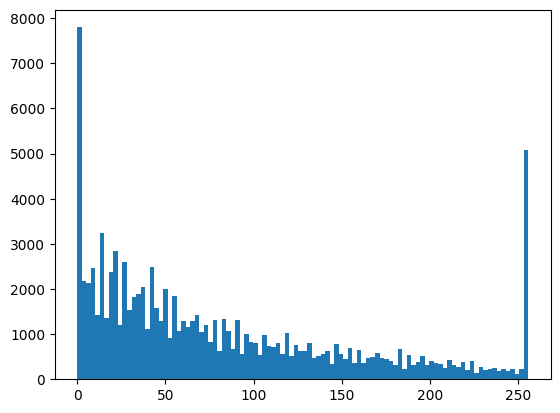

In [8]:
# Plot the distribution of the target variable (LAID_UP_TIME)
plt.hist(train_cleaned['LAID_UP_TIME'], bins=100)
plt.show()

In [9]:
# Based on the quantiles, we can divide the target variable into 2 classes
bins = [0, 59, np.inf]
labels = ["Short", "Long"]
train_cleaned['LAID_UP_TIME'] = pd.cut(train_cleaned['LAID_UP_TIME'], bins=bins, labels=labels, right=False)
train_cleaned['LAID_UP_TIME'].value_counts()

LAID_UP_TIME
Long     49609
Short    49212
Name: count, dtype: int64

## Splitting the Data

In [10]:
X = train_cleaned.drop(columns=['LAID_UP_TIME'])
y = train_cleaned['LAID_UP_TIME']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Training the Decision Tree Model

In [11]:
decision_tree = DecisionTreeClassifier(random_state=42, max_depth=3)
decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3, random_state=42)

## Evaluating the Model

In [12]:
y_pred = decision_tree.predict(X_test)
accuracy_score(y_test, y_pred)

0.7559322033898305

In [13]:
# Apply cross-validation
scores = cross_val_score(decision_tree, X, y, cv=5)
scores.mean()

np.float64(0.7550419457567932)

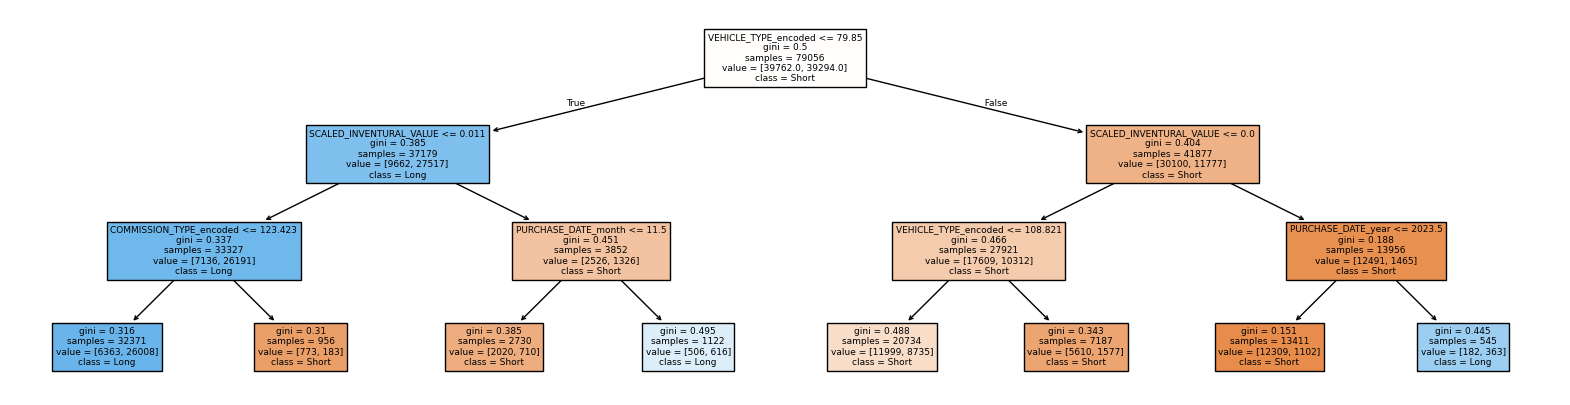

In [14]:
plt.figure(figsize=(20, 5))
plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=labels);

## Conclusion

As we can see from the tree, the model has identified some rules that influence vehicle downtime:
- If VEHICLE_TYPE_encoded > 79.85, SCALED_INVETURAL_VALUE > 0 and PURCHASE_DATE_year <= 2023.5, the LAID_UP_TIME is "SHORT".
- If VEHICLE_TYPE_encoded > 79.85, SCALED_INVETURAL_VALUE <= 0 and VEHICLE_TYPE_encoded <= 108.821 or > 108.821, LAID_UP_TIME is "SHORT".
- If VEHICLE_TYPE_encoded <= 79.85, SCALED_INVETURAL_VALUE <= 0.011 and COMMISION_TYPE_encoded > 123.423, LAID_UP_TIME is "SHORT".
- If VEHICLE_TYPE_encoded <= 79.85, SCALED_INVETURAL_VALUE > 0.011 and PURCHASE_DATE_month <= 11.5, the LAID_UP_TIME is "SHORT".

** Important Note: These rules provide an estimate of the LAID_UP_TIME but do not guarantee exact outcomes. As with any model, there is a degree of uncertainty, and the predictions may not be 100% correct. The model's performance is influenced by the quality and variety of the data, and factors not included in the model could also affect the LAID_UP_TIME.